In [8]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
 

In [9]:
df = pd.read_csv("1_boston_housing.csv")

In [10]:
df.head(n=10)

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
5,0.02985,0.0,2.18,0,0.458,6.430,58.7,6.0622,3,222,18.7,394.12,5.21,28.7
6,0.08829,12.5,7.87,0,0.524,6.012,66.6,5.5605,5,311,15.2,395.60,12.43,22.9
7,0.14455,12.5,7.87,0,0.524,6.172,96.1,5.9505,5,311,15.2,396.90,19.15,27.1
8,0.21124,12.5,7.87,0,0.524,5.631,100.0,6.0821,5,311,15.2,386.63,29.93,16.5
9,0.17004,12.5,7.87,0,0.524,6.004,85.9,6.5921,5,311,15.2,386.71,17.10,18.9


In [11]:
df.shape

(506, 14)

In [12]:
df.info

<bound method DataFrame.info of         crim    zn  indus  chas    nox     rm   age     dis  rad  tax  \
0    0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296   
1    0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242   
2    0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242   
3    0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222   
4    0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222   
..       ...   ...    ...   ...    ...    ...   ...     ...  ...  ...   
501  0.06263   0.0  11.93     0  0.573  6.593  69.1  2.4786    1  273   
502  0.04527   0.0  11.93     0  0.573  6.120  76.7  2.2875    1  273   
503  0.06076   0.0  11.93     0  0.573  6.976  91.0  2.1675    1  273   
504  0.10959   0.0  11.93     0  0.573  6.794  89.3  2.3889    1  273   
505  0.04741   0.0  11.93     0  0.573  6.030  80.8  2.5050    1  273   

     ptratio       b  lstat  MEDV  
0       15.3  396.90   4.98  24.0  
1       17.8  396.9

In [13]:
X = df.loc[:,df.columns != "MEDV"]
y = df.loc[:,df.columns == "MEDV"]

In [14]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state =123)

In [20]:
pip install tensorflow


In [21]:
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf


In [22]:
mms = MinMaxScaler()
mms.fit(X_train)
X_train = mms.transform(X_train)
X_test = mms.transform(X_test)

In [23]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [25]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Input(shape=(13,), name='input-layer'),
    tf.keras.layers.Dense(100, name='hidden-layer-2'),
    tf.keras.layers.BatchNormalization(name='hidden-layer-3'),
    tf.keras.layers.Dense(50, name='hidden-layer-4'),
    tf.keras.layers.Dense(1, name='output-layer')
])

In [30]:
pip install pydot

  Obtaining dependency information for pydot from https://files.pythonhosted.org/packages/7f/90/c9b51f3cdff89cd8f93382060330f43d1af098a6624cff439e700791e922/pydot-2.0.0-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [32]:
tf.keras.utils.plot_model(model, show_shapes=True)

You must install pydot (`pip install pydot`) for `plot_model` to work.


In [33]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ hidden-layer-2 (Dense)          │ (None, 100)            │         1,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-3                  │ (None, 100)            │           400 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ hidden-layer-4 (Dense)          │ (None, 50)             │         5,050 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ output-layer (Dense)            │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,901 (26.96 KB)

 Trainable params: 6,701 (26.18 KB)

 Non-trainable params: 200 (800.00 B)

In [34]:
from tensorflow.keras import optimizers
model.compile(
    optimizer='adam',
    loss='mse',
    metrics=['mae']
)


In [35]:
history = model.fit(X_train,y_train,epochs=30,validation_split=0.05 )

Epoch 1/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 2s 31ms/step - loss: 617.0686 - mae: 23.1371 - val_loss: 667.9888 - val_mae: 24.1504
Epoch 2/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 557.5829 - mae: 22.7237 - val_loss: 647.6033 - val_mae: 23.8033
Epoch 3/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 514.2089 - mae: 21.7877 - val_loss: 607.1440 - val_mae: 22.9757
Epoch 4/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 512.7382 - mae: 22.0248 - val_loss: 574.2088 - val_mae: 22.3479
Epoch 5/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 478.4770 - mae: 21.3155 - val_loss: 525.8142 - val_mae: 21.2951
Epoch 6/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 404.8403 - mae: 19.5664 - val_loss: 471.5251 - val_mae: 20.0437
Epoch 7/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 353.4832 - mae: 18.2028 - val_loss: 389.1114 - val_mae: 17.8833
Epoch 8/30
11/11 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 275.6903 - mae: 15.9158 - val_loss: 300.7753 - val_mae: 15.2208
Epoch 9/30
11/11 ━━━━━━

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 19ms/step


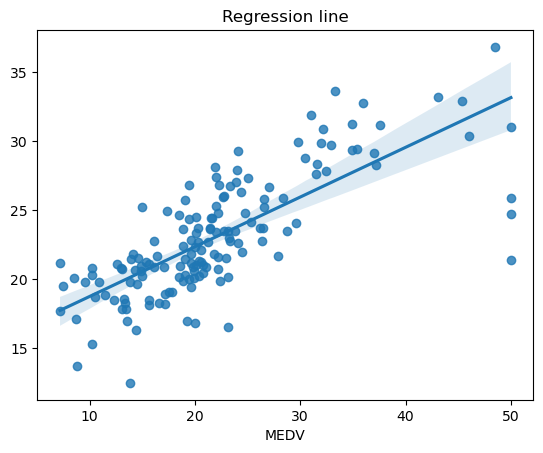

In [36]:
y_pred = model.predict(X_test)

sns.regplot(x=y_test, y=y_pred)
plt.title("Regression line")
plt.show()

In [37]:
from sklearn import metrics
mse_nn, mae_nn = model.evaluate(X_test, y_test)
f1 = metrics.r2_score(y_test, y_pred)

print('Mean squared error on test data: ', mse_nn)
print('Mean absolute error on test data: ', mae_nn)
print('F1 score on test data:', f1)

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 49.8743 - mae: 4.9055 
Mean squared error on test data:  42.09912872314453
Mean absolute error on test data:  4.6031813621521
F1 score on test data: 0.479152258888237
